In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [ ]:
# Define the dataset path
dataset_path = '/content/drive/MyDrive/Proyecto_Curso_BEIT_aves/birds_image/feathers/images'

In [ ]:
# 1. Understand the Folder Structure and Count Classes
class_folders = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
num_classes = len(class_folders)
print(f"Number of bird species (classes): {num_classes}")

Number of bird species (classes): 23


# Clases por Famiilias

In [ ]:
# 2. and 3. Count Images per Class

class_folders = [
    d for d in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, d))
]

image_counts = {}
total_images = 0

for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    count = 0

    # os.walk recorre todos los subdirectorios
    for root, _, files in os.walk(class_path):
        # Filtra por extensiones de imagen si lo deseas
        for fname in files:
            if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
                count += 1

    image_counts[class_folder] = count
    total_images += count

print(f"Total number of images: {total_images}")
print("\nImage counts per class:")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count}")

Total number of images: 28272

Image counts per class:
accipitriformes: 2783
anseriformes: 4555
apodiformes: 411
bucerotiformes: 161
caprimulgiformes: 658
charadriiformes: 3908
ciconiiformes: 800
coliiformes: 12
columbiformes: 656
coraciiformes: 415
cuculiformes: 128
galliformes: 1104
gaviiformes: 239
gruiformes: 557
passeriformes: 8480
pelecaniformes: 73
phoenicopteriformes: 259
piciformes: 872
procellariiformes: 272
psittaciformes: 234
pteroclidiformes: 19
strigiformes: 1650
trogoniformes: 26


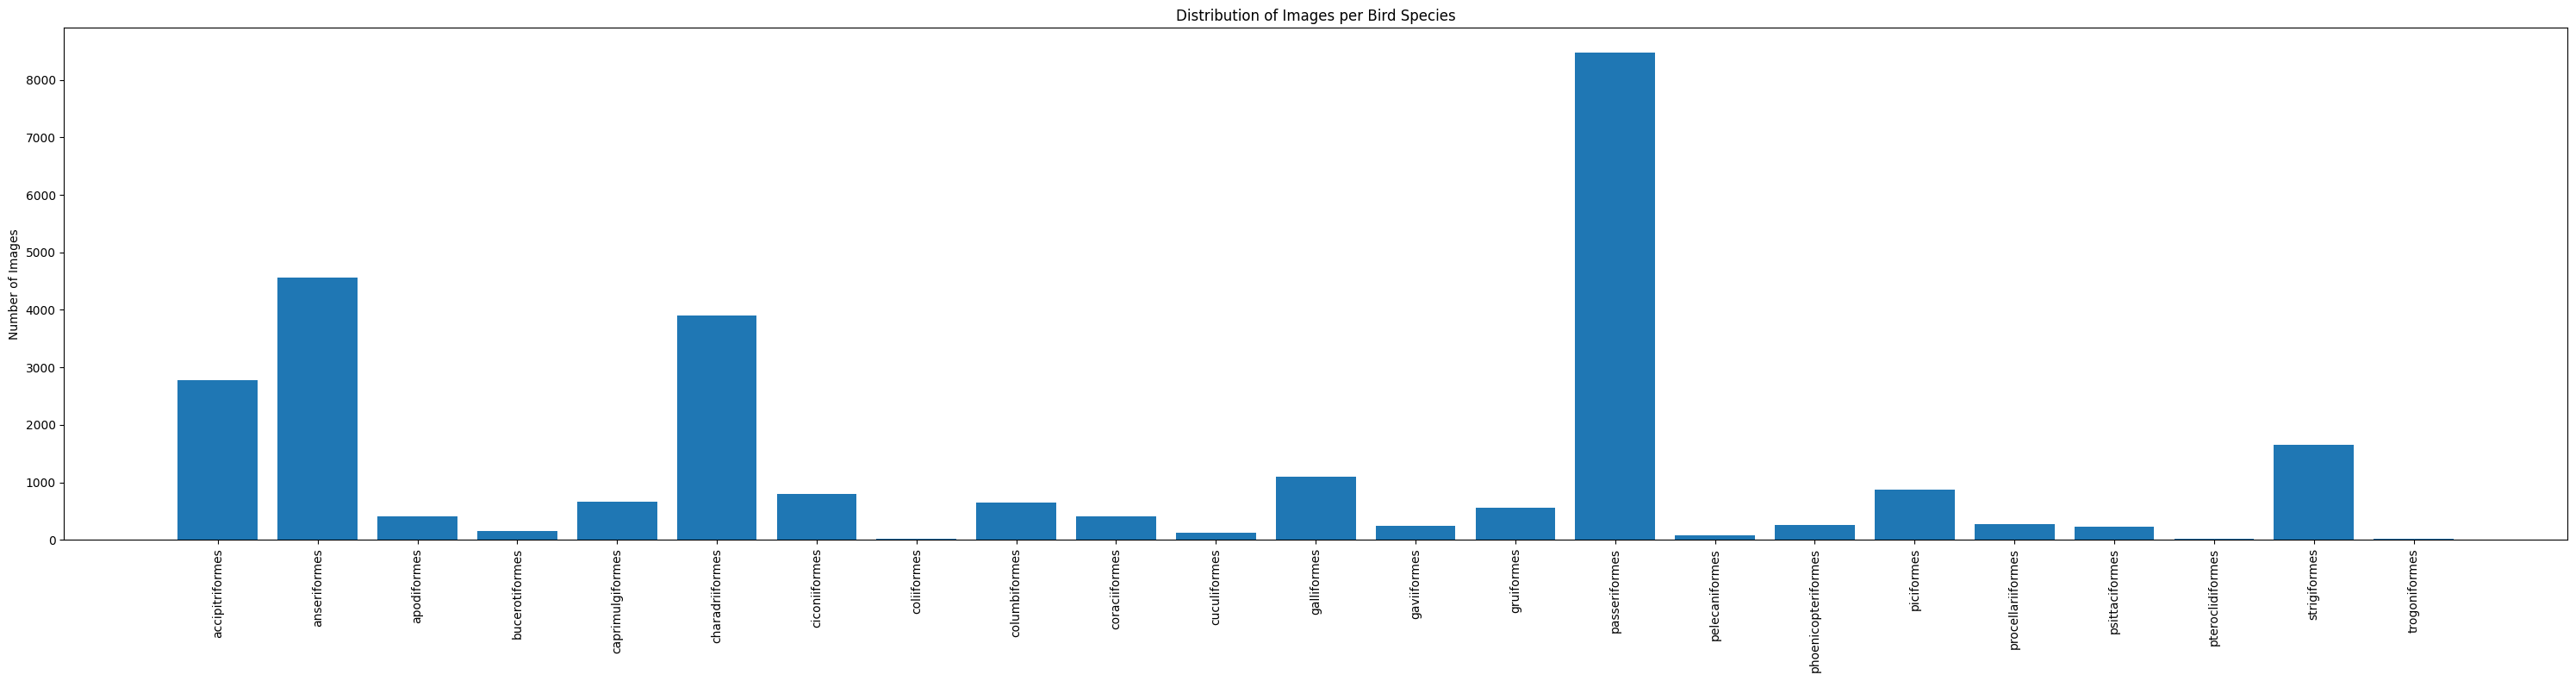

In [ ]:
# Basic class distribution visualization
class_names = list(image_counts.keys())
counts = list(image_counts.values())

plt.figure(figsize=(30, 8))
plt.bar(class_names, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Bird Species")
plt.tight_layout()
plt.show()

# Clases por Subfamilias


In [ ]:

classes = [
    d for d in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, d))
]

# Estructura: { clase: { subclase: n_imágenes, … }, … }
counts = {}
grand_total = 0

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    counts[cls] = {}

    # Listamos sólo las subcarpetas inmediatas
    subdirs = [
        d for d in os.listdir(cls_path)
        if os.path.isdir(os.path.join(cls_path, d))
    ]
    # Si no hubiera subcarpetas, podrías considerar contar directamente aquí

    for sub in subdirs:
        sub_path = os.path.join(cls_path, sub)
        n = 0
        for root, _, files in os.walk(sub_path):
            for f in files:
                if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
                    n += 1
        counts[cls][sub] = n
        grand_total += n

# Impresión de resultados
print(f"Gran total de imágenes: {grand_total}\n")
for cls, subs in counts.items():
    subtotal = sum(subs.values())
    print(f"Clase «{cls}» — Total: {subtotal}")
    for sub, cnt in subs.items():
        print(f"   · Subclase «{sub}»: {cnt}")
    print()

Gran total de imágenes: 28272

Clase «accipitriformes» — Total: 2783
   · Subclase «accipiter_brevipes»: 14
   · Subclase «accipiter_gentilis»: 438
   · Subclase «accipiter_nisus»: 620
   · Subclase «aegypius_monachus»: 4
   · Subclase «aquila_adalberti»: 2
   · Subclase «aquila_chrysaetos»: 130
   · Subclase «aquila_clanga»: 1
   · Subclase «aquila_heliaca»: 28
   · Subclase «aquila_nipalensis»: 78
   · Subclase «aquila_pennata»: 7
   · Subclase «aquila_pomarina_clanga_pomarina»: 81
   · Subclase «aquila_verreauxii»: 19
   · Subclase «aquila_wahlbergi»: 13
   · Subclase «buteo_augur»: 42
   · Subclase «buteo_buteo»: 105
   · Subclase «buteo_japonicus»: 10
   · Subclase «buteo_lagopus»: 33
   · Subclase «buteo_rufinus»: 92
   · Subclase «cathartes_aura»: 5
   · Subclase «circaetus_gallicus»: 73
   · Subclase «circus_aeruginosus»: 125
   · Subclase «circus_approximans»: 18
   · Subclase «circus_cyaneus»: 272
   · Subclase «circus_macrourus»: 1
   · Subclase «circus_pygargus»: 67
   · Su

<ipython-input-7-27841a02269f>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


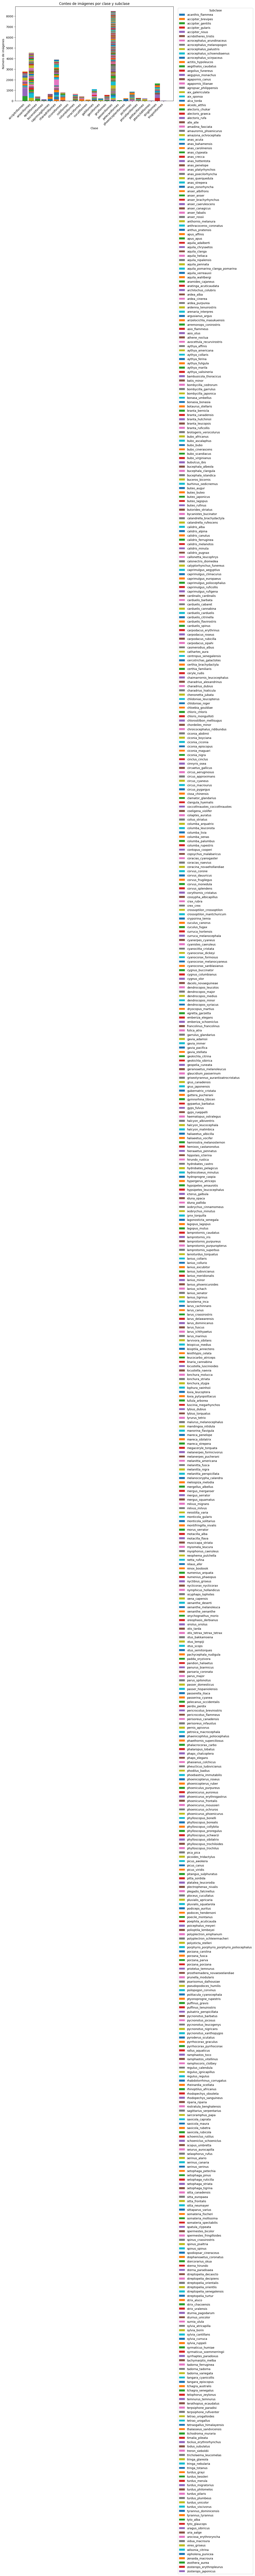

In [ ]:
# 1. Extraer listas ordenadas de clases y subclases
classes = list(counts.keys())
subclasses = sorted({sub for subs in counts.values() for sub in subs})

# 2. Construir la “matriz” de valores: filas=clases, columnas=subclases
data = [
    [counts[cls].get(sub, 0) for sub in subclasses]
    for cls in classes
]

# 3. Dibujar stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = [0] * len(classes)

for idx, sub in enumerate(subclasses):
    vals = [row[idx] for row in data]
    ax.bar(classes, vals, bottom=bottom, label=sub)
    bottom = [bottom[i] + vals[i] for i in range(len(vals))]

# 4. Decoración
ax.set_xlabel('Clase')
ax.set_ylabel('Número de imágenes')
ax.set_title('Conteo de imágenes por clase y subclase')
ax.legend(title='Subclase', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Muestreo


In [ ]:
import os
import cv2

# Define extensiones válidas de imagen
VALID_EXTS = {'.png', '.jpg', '.jpeg', '.tif', '.bmp'}

# 1. Listado de carpetas de primer nivel (clases)
class_folders = [
    d for d in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, d))
]

# 2. Recolectar una imagen de muestra por familia (segundo nivel)
sample_paths = []
for cls in class_folders:
    cls_path = os.path.join(dataset_path, cls)

    # detecta carpetas hijas (familias)
    family_folders = [
        f for f in os.listdir(cls_path)
        if os.path.isdir(os.path.join(cls_path, f))
    ]

    for fam in family_folders:
        fam_path = os.path.join(cls_path, fam)
        # lista archivos en la familia
        imgs = [
            fn for fn in os.listdir(fam_path)
            if os.path.isfile(os.path.join(fam_path, fn))
            and os.path.splitext(fn)[1].lower() in VALID_EXTS
        ]
        if imgs:
            # toma la primera imagen de esta familia
            sample_paths.append(os.path.join(fam_path, imgs[0]))
        # si quieres solo N familias en total, descomenta:
        # if len(sample_paths) >= 200: break

    # si quieres un límite total de muestras:
    if len(sample_paths) >= 200:
        break

print("\nAnalyzing sample image properties:")

# 3. Inicializar listas para las propiedades
image_dimensions = []
color_channels   = []
file_formats     = []

for img_path in sample_paths:
    try:
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            chans = img.shape[2] if img.ndim == 3 else 1

            image_dimensions.append((w, h))
            color_channels.append(chans)
            file_formats.append(os.path.splitext(img_path)[1].lower())

            print(f"Image: {os.path.basename(img_path)} | "
                  f"Dimensions: {w}×{h} | "
                  f"Channels: {chans} | "
                  f"Format: {os.path.splitext(img_path)[1]}")
        else:
            print(f"Could not read image: {img_path}")
    except Exception as e:
        print(f"Error processing {img_path}: {e}")



Analyzing sample image properties:
Image: accipitriformes_accipiter_brevipes_00000.jpg | Dimensions: 63×354 | Channels: 3 | Format: .jpg
Image: accipitriformes_accipiter_gentilis_00000.jpg | Dimensions: 115×502 | Channels: 3 | Format: .jpg
Image: accipitriformes_accipiter_nisus_00000.jpg | Dimensions: 55×78 | Channels: 3 | Format: .jpg
Image: accipitriformes_aegypius_monachus_00000.jpg | Dimensions: 2413×1355 | Channels: 3 | Format: .jpg
Image: accipitriformes_aquila_adalberti_00000.jpg | Dimensions: 180×878 | Channels: 3 | Format: .jpg
Image: accipitriformes_aquila_chrysaetos_00000.jpg | Dimensions: 64×335 | Channels: 3 | Format: .jpg
Image: accipitriformes_aquila_clanga_00000.jpg | Dimensions: 579×2086 | Channels: 3 | Format: .jpg
Image: accipitriformes_aquila_heliaca_00000.jpg | Dimensions: 195×873 | Channels: 3 | Format: .jpg
Image: accipitriformes_aquila_nipalensis_00000.jpg | Dimensions: 130×408 | Channels: 3 | Format: .jpg
Image: accipitriformes_aquila_pennata_00000.jpg | Dimen

In [ ]:
# Summarize image properties
if image_dimensions:
    print("\nSummary of image dimensions:")
    widths, heights = zip(*image_dimensions)
    print(f"Min Width: {min(widths)}, Max Width: {max(widths)}, Avg Width: {np.mean(widths):.2f}")
    print(f"Min Height: {min(heights)}, Max Height: {max(heights)}, Avg Height: {np.mean(heights):.2f}")

if color_channels:
    channel_counts = Counter(color_channels)
    print(f"\nColor channel distribution: {channel_counts}")

if file_formats:
    format_counts = Counter(file_formats)
    print(f"\nFile format distribution: {format_counts}")


Summary of image dimensions:
Min Width: 48, Max Width: 4101, Avg Width: 444.98
Min Height: 78, Max Height: 3403, Avg Height: 1035.65

Color channel distribution: Counter({3: 209})

File format distribution: Counter({'.jpg': 209})


In [ ]:
# Image Statistics (Example: Average pixel values - sampling)
print("\nCalculating average pixel values for a few samples:")
avg_pixels = []
for img_path in sample_paths:
     try:
        img = cv2.imread(img_path)
        if img is not None:
            avg_pixels.append(np.mean(img))
            print(f"Average pixel value for {os.path.basename(img_path)}: {np.mean(img):.2f}")
        else:
             print(f"Could not read image for average pixel calculation: {img_path}")
     except Exception as e:
            print(f"Error processing image {img_path} for average pixel calculation: {e}")

if avg_pixels:
    print(f"\nOverall average pixel value (sample): {np.mean(avg_pixels):.2f}")


Calculating average pixel values for a few samples:
Average pixel value for accipitriformes_accipiter_brevipes_00000.jpg: 154.92
Average pixel value for accipitriformes_accipiter_gentilis_00000.jpg: 62.05
Average pixel value for accipitriformes_accipiter_nisus_00000.jpg: 118.70
Average pixel value for accipitriformes_aegypius_monachus_00000.jpg: 90.94
Average pixel value for accipitriformes_aquila_adalberti_00000.jpg: 135.71
Average pixel value for accipitriformes_aquila_chrysaetos_00000.jpg: 150.18
Average pixel value for accipitriformes_aquila_clanga_00000.jpg: 75.47
Average pixel value for accipitriformes_aquila_heliaca_00000.jpg: 90.01
Average pixel value for accipitriformes_aquila_nipalensis_00000.jpg: 79.49
Average pixel value for accipitriformes_aquila_pennata_00000.jpg: 146.02
Average pixel value for accipitriformes_aquila_pomarina_clanga_pomarina_00000.jpg: 117.17
Average pixel value for accipitriformes_aquila_verreauxii_00000.jpg: 124.57
Average pixel value for accipitriform

In [ ]:


# Analyze class distribution in more detail
counts_df = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Count'])
print("\nClass Distribution Statistics:")
print(counts_df['Count'].describe())

# Identify imbalanced classes
min_count = counts_df['Count'].min()
max_count = counts_df['Count'].max()
mean_count = counts_df['Count'].mean()
std_count = counts_df['Count'].std()

print(f"\nMinimum images per class: {min_count}")
print(f"Maximum images per class: {max_count}")
print(f"Mean images per class: {mean_count:.2f}")
print(f"Standard deviation of images per class: {std_count:.2f}")

# Find classes with significantly fewer/more images than average
imbalance_threshold_std = 1.5 # Define a threshold (e.g., 1.5 standard deviations)
low_count_classes = counts_df[counts_df['Count'] < mean_count - imbalance_threshold_std * std_count]
high_count_classes = counts_df[counts_df['Count'] > mean_count + imbalance_threshold_std * std_count]

if not low_count_classes.empty:
    print("\nClasses with significantly fewer images (potential underrepresentation):")
    print(low_count_classes)

if not high_count_classes.empty:
    print("\nClasses with significantly more images (potential overrepresentation):")
    print(high_count_classes)




Class Distribution Statistics:
count      23.000000
mean     1229.217391
std      2000.928147
min        12.000000
25%       197.500000
50%       415.000000
75%       988.000000
max      8480.000000
Name: Count, dtype: float64

Minimum images per class: 12
Maximum images per class: 8480
Mean images per class: 1229.22
Standard deviation of images per class: 2000.93

Classes with significantly more images (potential overrepresentation):
            Class  Count
1    anseriformes   4555
14  passeriformes   8480



Displaying a few sample images:


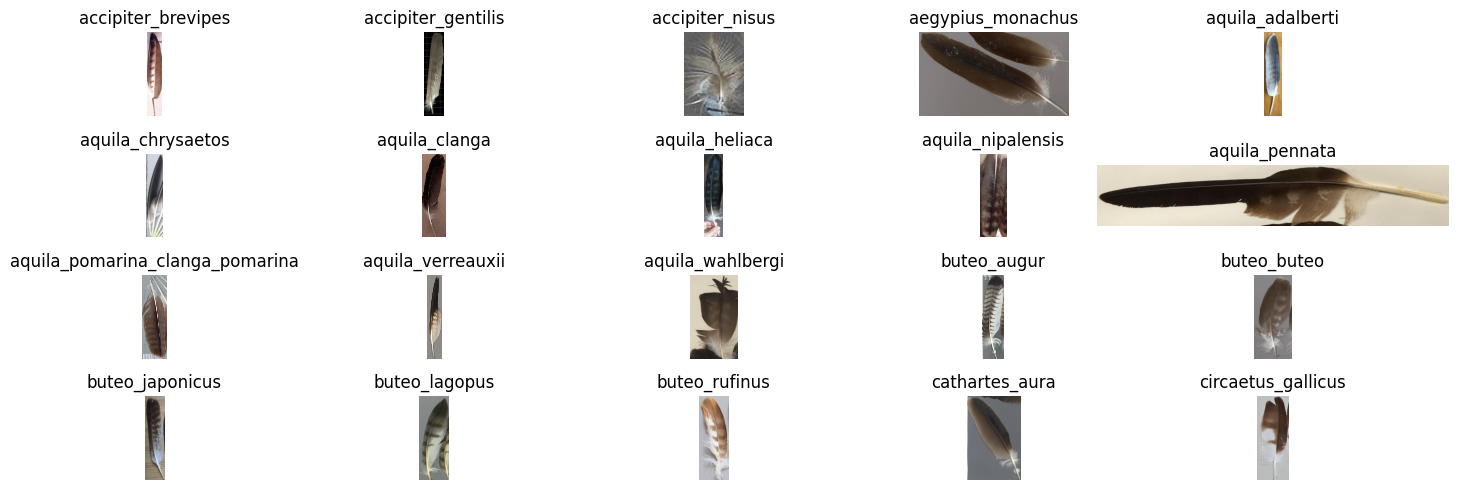

In [ ]:
# Example: Display sample images with their class labels
print("\nDisplaying a few sample images:")
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_paths[:20]): # Display first 5 sample images
    try:
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(4, 5, i + 1)
            plt.imshow(img_rgb)
            class_name = os.path.basename(os.path.dirname(img_path))
            plt.title(class_name.split('.')[-1]) # Get class name after the number prefix
            plt.axis('off')
        else:
             print(f"Could not read image for display: {img_path}")
    except Exception as e:
        print(f"Error displaying image {img_path}: {e}")
plt.tight_layout()
plt.show()

Collected pixel values from charadriiformes_calidris_minuta_00000.jpg
Collected pixel values from anseriformes_mergus_serrator_00000.jpg
Collected pixel values from apodiformes_avocettula_recurvirostris_00000.jpg
Collected pixel values from anseriformes_branta_hutchinsii_00000.jpg
Collected pixel values from anseriformes_mergus_squamatus_00000.jpg
Collected pixel values from accipitriformes_accipiter_gentilis_00000.jpg
Collected pixel values from charadriiformes_phalaropus_lobatus_00000.jpg
Collected pixel values from ciconiiformes_bubulcus_ibis_00000.jpg
Collected pixel values from anseriformes_aythya_ferina_00000.jpg
Collected pixel values from apodiformes_chlorostilbon_mellisugus_00000.jpg
Collected pixel values from anseriformes_tadorna_variegata_00000.jpg
Collected pixel values from anseriformes_aix_sponsa_00000.jpg
Collected pixel values from charadriiformes_calidris_pugnax_00000.jpg
Collected pixel values from accipitriformes_accipiter_nisus_00000.jpg
Collected pixel values from

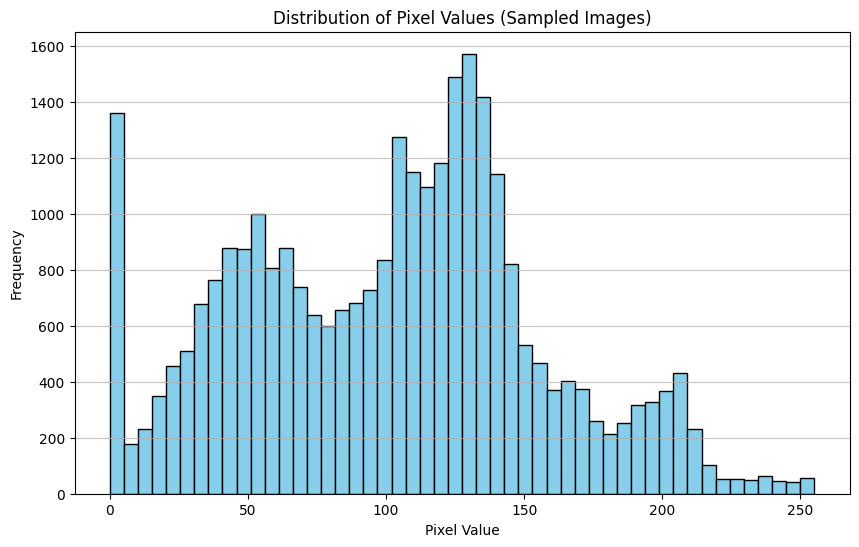


Summary of sampled pixel values:
Min Pixel Value: 0
Max Pixel Value: 255
Mean Pixel Value: 101.51
Median Pixel Value: 107.00
Standard Deviation: 54.23


In [ ]:
import random

# Limitar número de imágenes y número de píxeles por imagen
max_images = 30
max_pixels_per_image = 1000

# Seleccionar una muestra aleatoria de paths (si hay más que el límite)
sample_paths_subset = random.sample(sample_paths, min(max_images, len(sample_paths)))

sample_pixel_values = []

for img_path in sample_paths_subset:
    try:
        img = cv2.imread(img_path)
        if img is not None:
            pixels = img.flatten()
            # Seleccionar aleatoriamente algunos píxeles de cada imagen
            if len(pixels) > max_pixels_per_image:
                pixels = random.sample(list(pixels), max_pixels_per_image)
            sample_pixel_values.extend(pixels)
            print(f"Collected pixel values from {os.path.basename(img_path)}")
        else:
            print(f"Could not read image: {img_path}")
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

# Mostrar histograma y estadísticas si hay datos
if sample_pixel_values:
    plt.figure(figsize=(10, 6))
    plt.hist(sample_pixel_values, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.title("Distribution of Pixel Values (Sampled Images)")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    print(f"\nSummary of sampled pixel values:")
    print(f"Min Pixel Value: {min(sample_pixel_values)}")
    print(f"Max Pixel Value: {max(sample_pixel_values)}")
    print(f"Mean Pixel Value: {np.mean(sample_pixel_values):.2f}")
    print(f"Median Pixel Value: {np.median(sample_pixel_values):.2f}")
    print(f"Standard Deviation: {np.std(sample_pixel_values):.2f}")
else:
    print("No pixel values were collected.")

In [ ]:
# Get a few sample image paths from different classes
sample_paths = []
for class_folder in class_folders[:200]: # Take samples from 200 classes
    class_path = os.path.join(dataset_path, class_folder)
    images_in_class = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    if images_in_class:
        sample_paths.append(os.path.join(class_path, images_in_class[0])) # Take the first image from each class

In [ ]:
# Get a few sample image paths from different classes → families
sample_paths = []
VALID_EXTS = {'.png', '.jpg', '.jpeg', '.tif', '.bmp'}

for class_folder in class_folders[:200]:  # Take up to 200 classes
    class_path = os.path.join(dataset_path, class_folder)
    if not os.path.isdir(class_path):
        continue

    # Recorre cada “familia” (subcarpeta) dentro de la clase
    for family_folder in os.listdir(class_path):
        fam_path = os.path.join(class_path, family_folder)
        if not os.path.isdir(fam_path):
            continue

        # Listar imágenes válidas dentro de esta familia
        images_in_family = [
            fname for fname in os.listdir(fam_path)
            if os.path.isfile(os.path.join(fam_path, fname))
            and os.path.splitext(fname)[1].lower() in VALID_EXTS
        ]
        if images_in_family:
            # Toma la primera imagen de la familia
            sample_paths.append(os.path.join(fam_path, images_in_family[0]))
            break  # pasa a la siguiente clase una vez encontrada una muestra

    # Detén si ya tienes 200 muestras en total
    if len(sample_paths) >= 200:
        break

print(f"Collected {len(sample_paths)} sample image paths.")

Collected 23 sample image paths.


In [ ]:
# Initialize the lists before the loop
image_dimensions = []
color_channels = []
file_formats = []

for img_path in sample_paths:
    try:
        img = cv2.imread(img_path)
        if img is not None:
            height, width = img.shape[:2]
            image_dimensions.append((width, height))
            channels = img.shape[2] if len(img.shape) == 3 else 1
            color_channels.append(channels) # <--- Here it is populated
            file_formats.append(os.path.splitext(img_path)[1])
            print(f"Image: {os.path.basename(img_path)}, Dimensions: ({width}x{height}), Channels: {channels}, Format: {os.path.splitext(img_path)[1]}")
        else:
            print(f"Could not read image: {img_path}")
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

Image: accipitriformes_accipiter_brevipes_00000.jpg, Dimensions: (63x354), Channels: 3, Format: .jpg
Image: anseriformes_aix_galericulata_00000.jpg, Dimensions: (248x1278), Channels: 3, Format: .jpg
Image: apodiformes_apus_affinis_00000.jpg, Dimensions: (183x437), Channels: 3, Format: .jpg
Image: bucerotiformes_anthracoceros_coronatus_00000.jpg, Dimensions: (455x2854), Channels: 3, Format: .jpg
Image: caprimulgiformes_caprimulgus_aegyptius_00000.jpg, Dimensions: (276x1890), Channels: 3, Format: .jpg
Image: charadriiformes_actitis_hypoleucos_00000.jpg, Dimensions: (163x936), Channels: 3, Format: .jpg
Image: ciconiiformes_ardea_alba_00000.jpg, Dimensions: (704x2183), Channels: 3, Format: .jpg
Image: coliiformes_colius_striatus_00000.jpg, Dimensions: (174x867), Channels: 3, Format: .jpg
Image: columbiformes_columba_arquatrix_00000.jpg, Dimensions: (414x1672), Channels: 3, Format: .jpg
Image: coraciiformes_alcedo_atthis_00000.jpg, Dimensions: (109x714), Channels: 3, Format: .jpg
Image: cuc

Observed number of color channels in sample images: {3}
Count of images with different numbers of channels: Counter({3: 23})
Most sample images appear to be color images (3 channels, likely BGR).

Analyzing channel intensity distribution for a sample color image: accipitriformes_accipiter_brevipes_00000.jpg


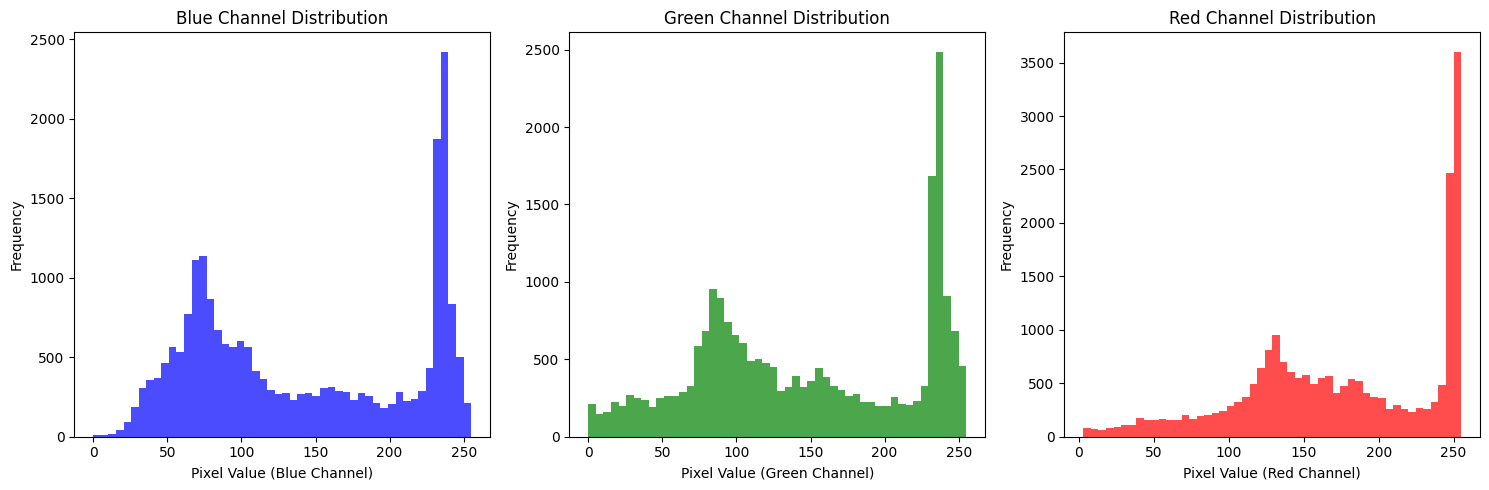


Analysis of Pixels and Channels Complete (Sample-based)


In [ ]:
if color_channels:
    print(f"Observed number of color channels in sample images: {set(color_channels)}")
    channel_counts = Counter(color_channels)
    print(f"Count of images with different numbers of channels: {channel_counts}")

    # Assuming 3 channels are BGR (OpenCV default) for color images
    if 3 in channel_counts:
        print("Most sample images appear to be color images (3 channels, likely BGR).")
    if 1 in channel_counts:
        print("Some sample images appear to be grayscale (1 channel).")

    # Example: Analyze channel intensity distribution for a sample color image
    color_sample_path = None
    for img_path in sample_paths:
        try:
            img = cv2.imread(img_path)
            if img is not None and len(img.shape) == 3 and img.shape[2] == 3:
                color_sample_path = img_path
                break
        except Exception:
            pass # Ignore errors while searching for a color image

    if color_sample_path:
        print(f"\nAnalyzing channel intensity distribution for a sample color image: {os.path.basename(color_sample_path)}")
        img_color = cv2.imread(color_sample_path)
        if img_color is not None:
            # Split channels (OpenCV loads in BGR order)
            b_channel, g_channel, r_channel = cv2.split(img_color)

            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.hist(b_channel.flatten(), bins=50, color='blue', alpha=0.7)
            plt.xlabel("Pixel Value (Blue Channel)")
            plt.ylabel("Frequency")
            plt.title("Blue Channel Distribution")

            plt.subplot(1, 3, 2)
            plt.hist(g_channel.flatten(), bins=50, color='green', alpha=0.7)
            plt.xlabel("Pixel Value (Green Channel)")
            plt.ylabel("Frequency")
            plt.title("Green Channel Distribution")

            plt.subplot(1, 3, 3)
            plt.hist(r_channel.flatten(), bins=50, color='red', alpha=0.7)
            plt.xlabel("Pixel Value (Red Channel)")
            plt.ylabel("Frequency")
            plt.title("Red Channel Distribution")

            plt.tight_layout()
            plt.show()
        else:
            print(f"Could not read the sample color image {color_sample_path}")
    else:
        print("\nCould not find a sample color image to analyze channel intensity distribution.")

print("\nAnalysis of Pixels and Channels Complete (Sample-based)")


Analyzing Aspect Ratio Distribution (Sample Images):


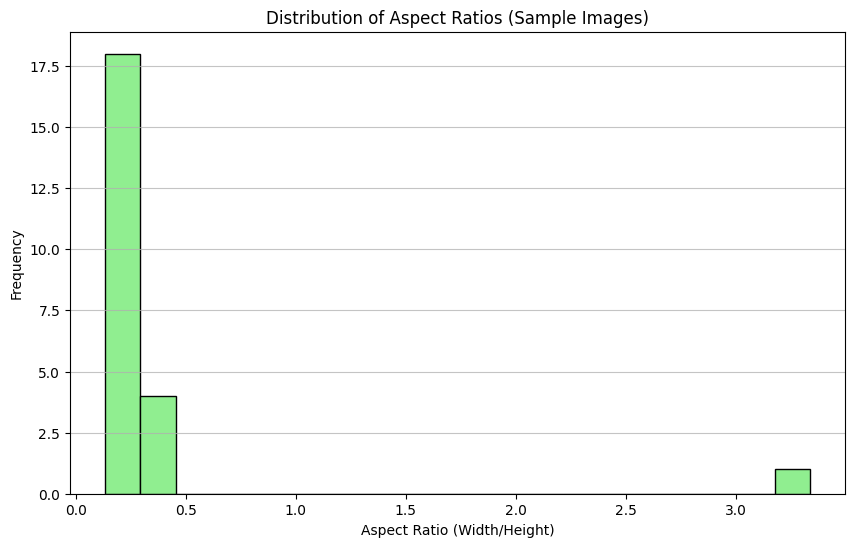


Summary of aspect ratios (sample):
Min Aspect Ratio: 0.13
Max Aspect Ratio: 3.33
Mean Aspect Ratio: 0.37
Median Aspect Ratio: 0.22
Standard Deviation of Aspect Ratios: 0.64

Advanced EDA Complete (Sample-based).
Based on this analysis, we have a better understanding of:
- The number of classes and overall image count.
- The distribution of images per class, highlighting potential imbalance issues.
- Basic image properties like dimensions, channel counts, and formats (from samples).
- Pixel value distributions and average intensities (from samples), which can indicate lighting or contrast variations.
- Aspect ratio distribution (from samples), useful for preprocessing/resizing strategies.

Next Steps (depending on the task):
- Address class imbalance (e.g., data augmentation, weighted loss, resampling).
- Decide on image preprocessing steps (resizing, normalization, data augmentation) based on dimension and pixel distribution analysis.
- If training a model, consider the implications o

In [ ]:

print("\nAnalyzing Aspect Ratio Distribution (Sample Images):")

sample_aspect_ratios = []
for img_path in sample_paths:
    try:
        img = cv2.imread(img_path)
        if img is not None:
            height, width = img.shape[:2]
            aspect_ratio = width / height
            sample_aspect_ratios.append(aspect_ratio)
            # print(f"Aspect ratio for {os.path.basename(img_path)}: {aspect_ratio:.2f}")
        else:
             print(f"Could not read image for aspect ratio calculation: {img_path}")
    except Exception as e:
            print(f"Error processing image {img_path} for aspect ratio calculation: {e}")

if sample_aspect_ratios:
    plt.figure(figsize=(10, 6))
    plt.hist(sample_aspect_ratios, bins=20, color='lightgreen', edgecolor='black')
    plt.xlabel("Aspect Ratio (Width/Height)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Aspect Ratios (Sample Images)")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    print(f"\nSummary of aspect ratios (sample):")
    print(f"Min Aspect Ratio: {min(sample_aspect_ratios):.2f}")
    print(f"Max Aspect Ratio: {max(sample_aspect_ratios):.2f}")
    print(f"Mean Aspect Ratio: {np.mean(sample_aspect_ratios):.2f}")
    print(f"Median Aspect Ratio: {np.median(sample_aspect_ratios):.2f}")
    print(f"Standard Deviation of Aspect Ratios: {np.std(sample_aspect_ratios):.2f}")
else:
    print("No sample images processed to calculate aspect ratios.")

print("\nAdvanced EDA Complete (Sample-based).")
print("Based on this analysis, we have a better understanding of:")
print("- The number of classes and overall image count.")
print("- The distribution of images per class, highlighting potential imbalance issues.")
print("- Basic image properties like dimensions, channel counts, and formats (from samples).")
print("- Pixel value distributions and average intensities (from samples), which can indicate lighting or contrast variations.")
print("- Aspect ratio distribution (from samples), useful for preprocessing/resizing strategies.")
print("\nNext Steps (depending on the task):")
print("- Address class imbalance (e.g., data augmentation, weighted loss, resampling).")
print("- Decide on image preprocessing steps (resizing, normalization, data augmentation) based on dimension and pixel distribution analysis.")
print("- If training a model, consider the implications of different aspect ratios or grayscale images.")
print("- For more thorough analysis, expand sampling to cover a larger subset or the entire dataset if computationally feasible.")


# Cladograma

In [5]:
# Paso 1: Librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from tqdm import tqdm

# Paso 2: Ruta a tu carpeta de imágenes
# Cambia esto a la ruta real de tus imágenes en Google Drive o local en Colab
image_dir = "/content/drive/MyDrive/Proyecto_Curso_BEIT_aves/birds_image/feathers/images"  # ajusta esta ruta

# Paso 3: Parámetros
target_size = (64, 64)  # resolución para simplificar el análisis

# Paso 4: Cargar y convertir las imágenes a vectores
image_vectors = []
image_names = []

for filename in tqdm(sorted(os.listdir(image_dir))):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff')):
        try:
            path = os.path.join(image_dir, filename)
            img = Image.open(path).convert("RGB").resize(target_size)
            img_array = np.asarray(img).astype(np.float32).flatten()
            image_vectors.append(img_array)
            image_names.append(filename)
        except Exception as e:
            print(f"Error con {filename}: {e}")

X = np.array(image_vectors)
X_scaled = StandardScaler().fit_transform(X)  # Normalizamos los vectores

# Paso 5: Clustering jerárquico
Z = linkage(X_scaled, method='ward')  # También puedes usar 'average' o 'complete'

# Paso 6: Dendrograma
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=image_names,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title("Cladograma de Similitud Visual entre Imágenes de Plumas")
plt.xlabel("Imágenes")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()


100%|██████████| 23/23 [00:00<00:00, 156860.15it/s]


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.